# Duffing Oscillator

The Duffing Oscillator is a model of a driven iron pendulum between two magnets. The model is:

$m\ddot{x} = -\gamma\dot{x} + 2ax - 4bx^2 + F_0\cos{\omega t}$

In this notebook the constants will be taken as:

$m = 1, F_0 = 2, \omega = 2.4, \gamma = 1, a = \frac{1}{4}, b = \frac{1}{2}$

### A simple solution

Here the RK4 method is applied to get numerical solutions to the equations.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#constants
m = 1
F_0 = 2
omega = 5   #changed for testing
gamma = 0.1
a = 1/4
b = 1/2

#simulation parameter
h = .01
numberOfRuns = 10**6

#iterator
def iterateRK4(t_n,y_n,f):
    """ 
    Finds y(t_n+h) for the equation dy/dt = f(t,y) via RK4 method.
    """
    k_1 = f(t_n, y_n)
    k_2 = f(t_n + h/2, y_n + h*k_1/2)
    k_3 = f(t_n + h/2, y_n + h*k_2/2)
    k_4 = f(t_n + h, y_n + h*k_3)

    return y_n + h*(k_1 + 2*k_2 + 2*k_3 + k_4)/6

#f(t,y) function , y = np.array([x,p])
def f(t,R):
    """
    Returns the f(t,R) vector for the duffing oscillator.
    """
    x = R[0]
    p = R[1]
    f_x = p/m
    f_p = -(gamma*p)/m +2*a*x -4*b*(x**3) + F_0*np.cos(omega*t)
    return np.array([f_x,f_p])

def simulateDuffing(RState):
    """
    Uses RK4 method to find a set of points on the solution to the Lorenz eq given an intial condition.
    """
    RStates = [RState]
    tStates = [0]

    for x in range(numberOfRuns):
        RStates.append(iterateRK4(tStates[-1],RStates[-1],f))
        tStates.append(tStates[-1]+h)
    return tStates, RStates

def transformToXYZ(lst):
    """
    Transfroms [np.array([1,2]),np.array([3,4])] to [[1,3],[2,4]]
    """
    return [[s[c] for s in lst] for c in range(2)]

In [65]:
#example simulation
t1, R1 = simulateDuffing(np.array([0.5,0]))
xR1List = transformToXYZ(R1)

#graph
plt.plot(xR1List[0], xR1List[1], 'blue',linewidth = '.5')
plt.xlabel("")
plt.ylabel("")
plt.title(r'')
plt.show()

### Strange Attractor

The set of points $t_0 + \dfrac{2\pi}{\omega}n$ where $n$ is an integer turn out to form a strange attractor.

32258.064516129034


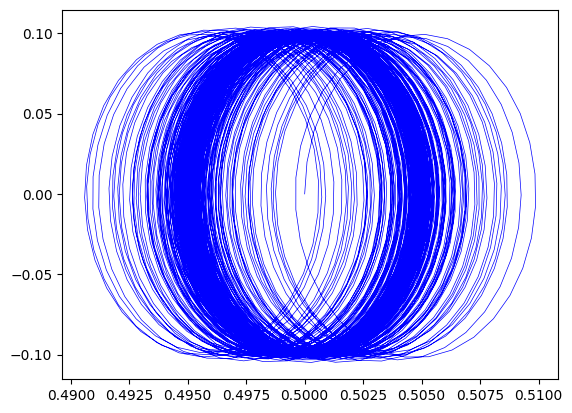

In [ ]:
nPeriodic  = np.floor(2*np.pi/(omega*h))
print(numberOfRuns/nPeriodic)

periodicList = []
for i in range(int(np.floor(numberOfRuns/nPeriodic))):
    periodicList.append(R1[i])

xR1ListPeriodic = transformToXYZ(periodicList)

plt.plot(xR1ListPeriodic[0], xR1ListPeriodic[1], 'blue',linewidth = '.5')
plt.xlabel("")
plt.ylabel("")
plt.title(r'')
plt.show()
